## **Sepsis Classification Machine Learning Project**

## **Business Understanding**

Sepsis, a life-threatening condition, arises from the body's exaggerated response to an infection, causing widespread inflammation, organ damage, and potential organ failure. Prompt medical intervention is essential, as sepsis is often triggered by various infections. Symptoms encompass fever, rapid heart rate, breathing difficulties, low blood pressure, and altered mental status. Treatment entails antibiotics, intravenous fluids, and supportive care. Early detection is paramount for a favorable prognosis.

This project centers on the early detection and classification of sepsis, a pivotal aspect of healthcare. Timely identification markedly improves patient outcomes. The objective is to construct a robust machine learning model for sepsis classification and deploy it as a web application using FastAPI, facilitating real-time predictions.

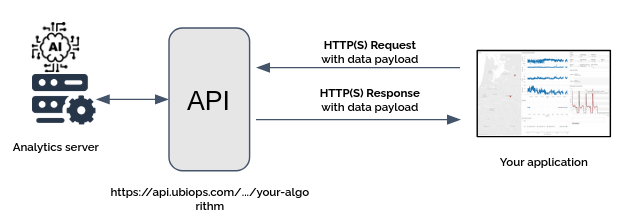

Source : The benefits of Machine Learning APIs - UbiOps

## **Project Description**

As we embark on our project journey, our first step will be to construct a minimal API demo utilizing FastAPI. This preliminary phase is crucial for ensuring that all components are correctly configured and operating as intended.

Following the successful setup of the demo, our focus will shift to crafting our own API tailored to interact seamlessly with a Machine Learning model. This bespoke API will facilitate the following workflow:

1. Receiving data through API requests from our clients.
2. Collaboratively processing the received data to prepare it for ingestion into the Machine Learning model.
3. Transmitting the preprocessed data to the Machine Learning model for prediction.
4. Coordinating the handling of predictions generated by the model.
5. Orchestrating the delivery of processed predictions as the API's response to our clients' initial requests.
By collectively implementing this comprehensive process, our API will empower users to harness the capabilities of Machine Learning, thereby enabling them to access valuable insights and predictions derived from their input data.






1.1. Objectives

Understanding the Data:

Comprehensively analyze patient data, including health-related features, demographics, and sepsis presence or absence. This understanding enables healthcare professionals to make informed decisions regarding patient care and intervention.

Sepsis Prediction:

Develop a precise machine learning classification model to predict the likelihood of sepsis based on provided features. Early and accurate sepsis prediction is crucial for timely medical intervention, improving patient outcomes.

Integration into Web Application:

Incorporate the trained sepsis classification model into a web application using FastAPI. This application serves as a practical tool for healthcare practitioners to input patient data and receive real-time sepsis risk predictions, facilitating clinical decision-making.

1.2. Methodology

To achieve the project objectives, follow a structured approach:

Data Understanding:

Explore patient data, including age, vital signs, and medical history, to gain insights and identify data quality issues.

Data Preparation:

Handle missing values, perform feature engineering, and encode categorical variables as needed to prepare data for machine learning model training.

Model Development:

Select and implement a suitable machine learning classification model for sepsis prediction. Train the model on historical patient data to identify patterns indicative of sepsis.

Model Evaluation:

Assess model performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Rigorous evaluation identifies the model's effectiveness in predicting sepsis cases.

FastAPI Integration:

Integrate the trained machine learning model into a FastAPI-based web application, providing a user-friendly interface for healthcare professionals to input patient data and obtain sepsis risk predictions.

Testing and Validation:

Conduct thorough testing and validation of the web application to ensure reliability and accuracy in real-time sepsis risk assessment.

Documentation:

Provide detailed documentation on using the web application, including input requirements and result interpretation.

By following this methodology, the project aims to provide healthcare professionals with a valuable tool for early sepsis detection and decision support, ultimately contributing to improved patient care and outcomes.

 ## **The Hypothesis**

 ### **Null Hypothesis:** 
The mean Plasma glucose level (PRG) is not significantly different between patients who develop sepsis during their ICU stay and those who do not.

### **Alternative Hypothesis:**
The mean Plasma glucose level (PRG) is significantly different between patients who develop sepsis during their ICU stay and those who do not.


## **The Analytical Questions**

1. What is the average Plasma glucose level (PRG) among patients who develop sepsis compared to those who do not?
2. Are there any significant differences in Blood Pressure (PR), Body mass index (M11), or age between patients who develop sepsis and those who do not?
3. Is there a correlation between insurance status and the likelihood of developing sepsis during an ICU stay?
4. Can Machine Learning models accurately predict the development of sepsis based on the provided variables?
5. What are the most important predictors of sepsis development among the variables examined?
6. How does the presence of valid insurance coverage impact the risk of sepsis among ICU patients?
7. Are there any interactions or nonlinear relationships between the variables and the likelihood of sepsis development?
8. How does the prevalence of sepsis vary across different age groups and insurance statuses?
9. Are there any specific thresholds or cutoff values for variables such as Plasma glucose (PRG) or Body mass index (M11) that are associated with an increased risk of sepsis?
10. How can the insights gained from analyzing these variables be used to improve early detection and prevention strategies for sepsis in ICU settings?






##  **Data Understanding**

1. ID: number to represent patient ID
2. PRG: Plasma glucose
3. PL: Blood Work Result-1 (mu U/ml)
4. PR: Blood Pressure (mm Hg)
5. SK: Blood Work Result-2 (mm)
6. TS: Blood Work Result-3 (mu U/ml)
7. M11: Body mass index (weight in kg/(height in m)^2
8. BD2: Blood Work Result-4 (mu U/ml)
9. Age: patients age (years)
10. Insurance: If a patient holds a valid insurance card
11. Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis

## 1. Importing the relevant libraries and modules

In [2]:
import pyodbc
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from numpy import log1p
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import joblib
import os 

# 2. Loading data Paitients_Files_Test and train

In [5]:
df_Paitients_Files_Test= pd.read_csv('Dataset/Paitients_Files_Test.csv')
# Display the first few rows of the DataFrame
df_Paitients_Files_Test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [6]:
df_Paitients_Files_Train= pd.read_csv('Dataset/Paitients_Files_Train.csv')
# Display the first few rows of the DataFrame
df_Paitients_Files_Train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [8]:
#info of Paitients_Files_Test
df_Paitients_Files_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [10]:
df_Paitients_Files_Train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [13]:
# Check for duplicated rows if any in the first 599 data points
df_Paitients_Files_Train.duplicated().sum()

0

In [15]:
# check unique values for the first 599 dataFrame
unique_values_per_column = df_Paitients_Files_Train.apply(pd.unique)
print(unique_values_per_column)

ID           [ICU200010, ICU200011, ICU200012, ICU200013, I...
PRG          [6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,...
PL           [148, 85, 183, 89, 137, 116, 78, 115, 197, 125...
PR           [72, 66, 64, 40, 74, 50, 0, 70, 96, 92, 80, 60...
SK           [35, 29, 0, 23, 32, 45, 19, 47, 38, 30, 41, 33...
TS           [0, 94, 168, 88, 543, 846, 175, 230, 83, 96, 2...
M11          [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35....
BD2          [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2...
Age          [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5...
Insurance                                               [0, 1]
Sepssis                                   [Positive, Negative]
dtype: object


In [17]:
# Display summary statistics for df_Paitients_Files_Train dataset
df_Paitients_Files_Train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# Check for missing values in columns
df_Paitients_Files_Train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

### <b> Exploratory Data Analysis

### <b> Univariate Data analysis

In [25]:
sep_df=df_Paitients_Files_Train['Sepssis'].value_counts(normalize=True)
sep_df

Sepssis
Negative    0.652755
Positive    0.347245
Name: proportion, dtype: float64

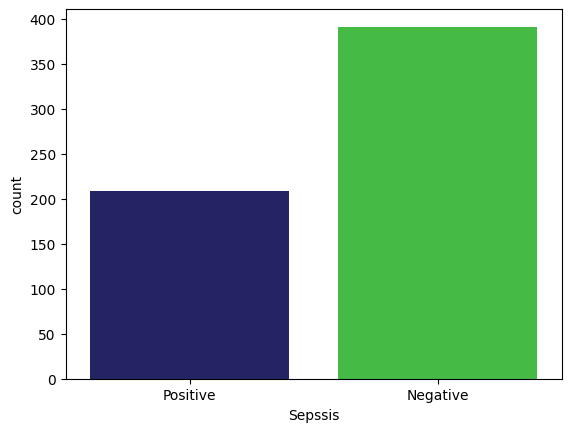

In [28]:
sns.countplot(data=df_Paitients_Files_Train, x='Sepssis', palette=['midnightblue', 'limegreen'])
plt.show()

<b>The dataset exhibits an imbalance, where the number of negative sepsis cases surpasses that of positive sepsis cases.

In [30]:
sep_df=df_Paitients_Files_Train['Insurance'].value_counts(normalize=True)
sep_df

Insurance
1    0.686144
0    0.313856
Name: proportion, dtype: float64

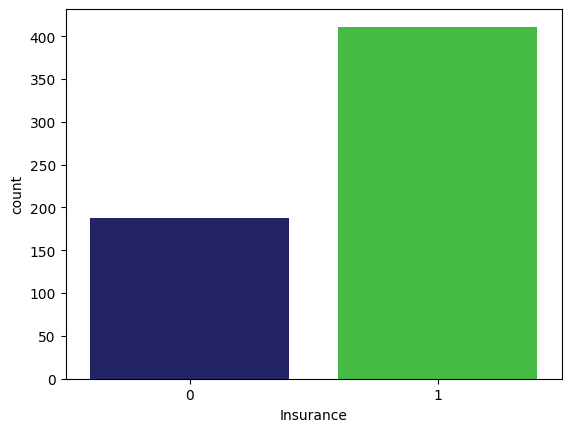

In [31]:
sns.countplot(data=df_Paitients_Files_Train, x='Insurance', palette=['midnightblue', 'limegreen'])
plt.show()

<b> The count of patients with valid health insurance coverage exceeds the count of those without valid coverage.


In [32]:
cols = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

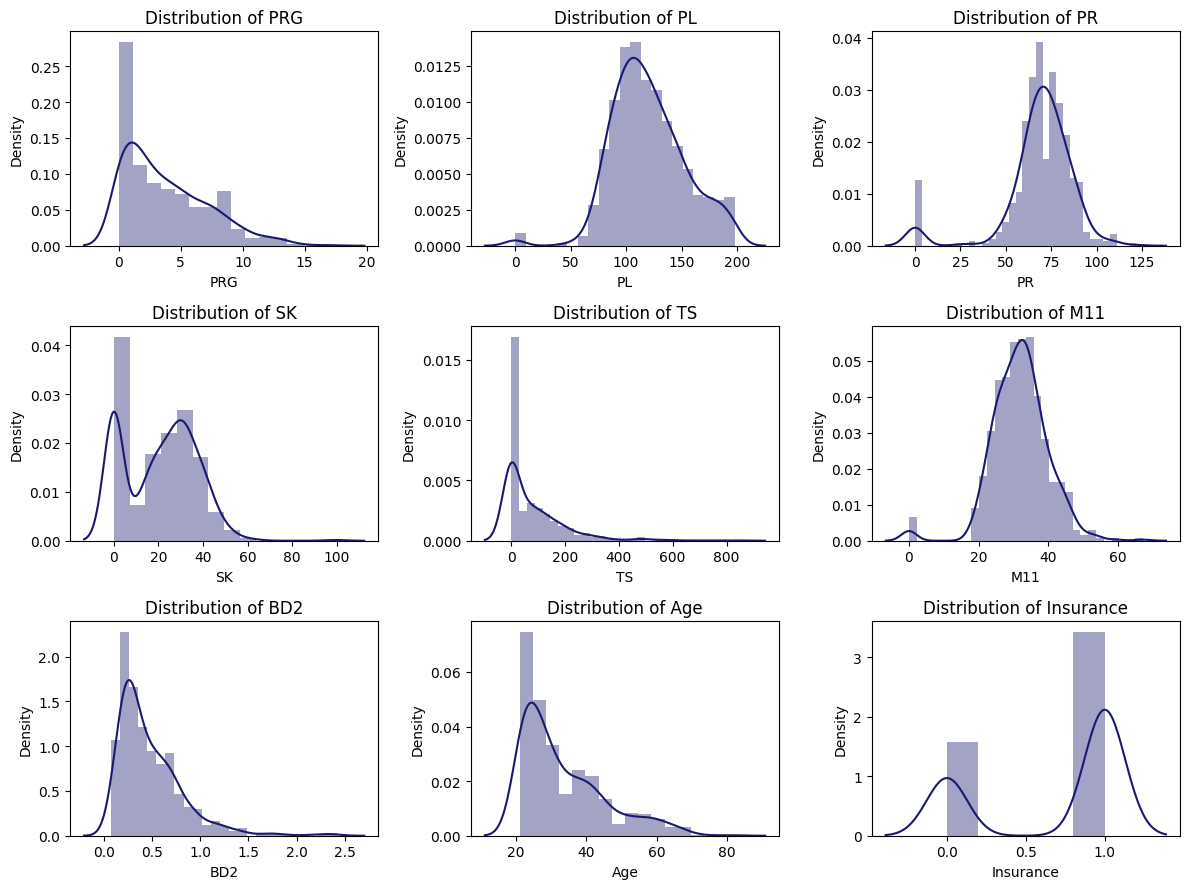

In [33]:
# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(cols) + num_cols - 1) // num_cols  

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3 * num_rows))

# Plot histograms for specific columns
for i, col in enumerate(cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.distplot(df_Paitients_Files_Train[col], kde=True,ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Distribution of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

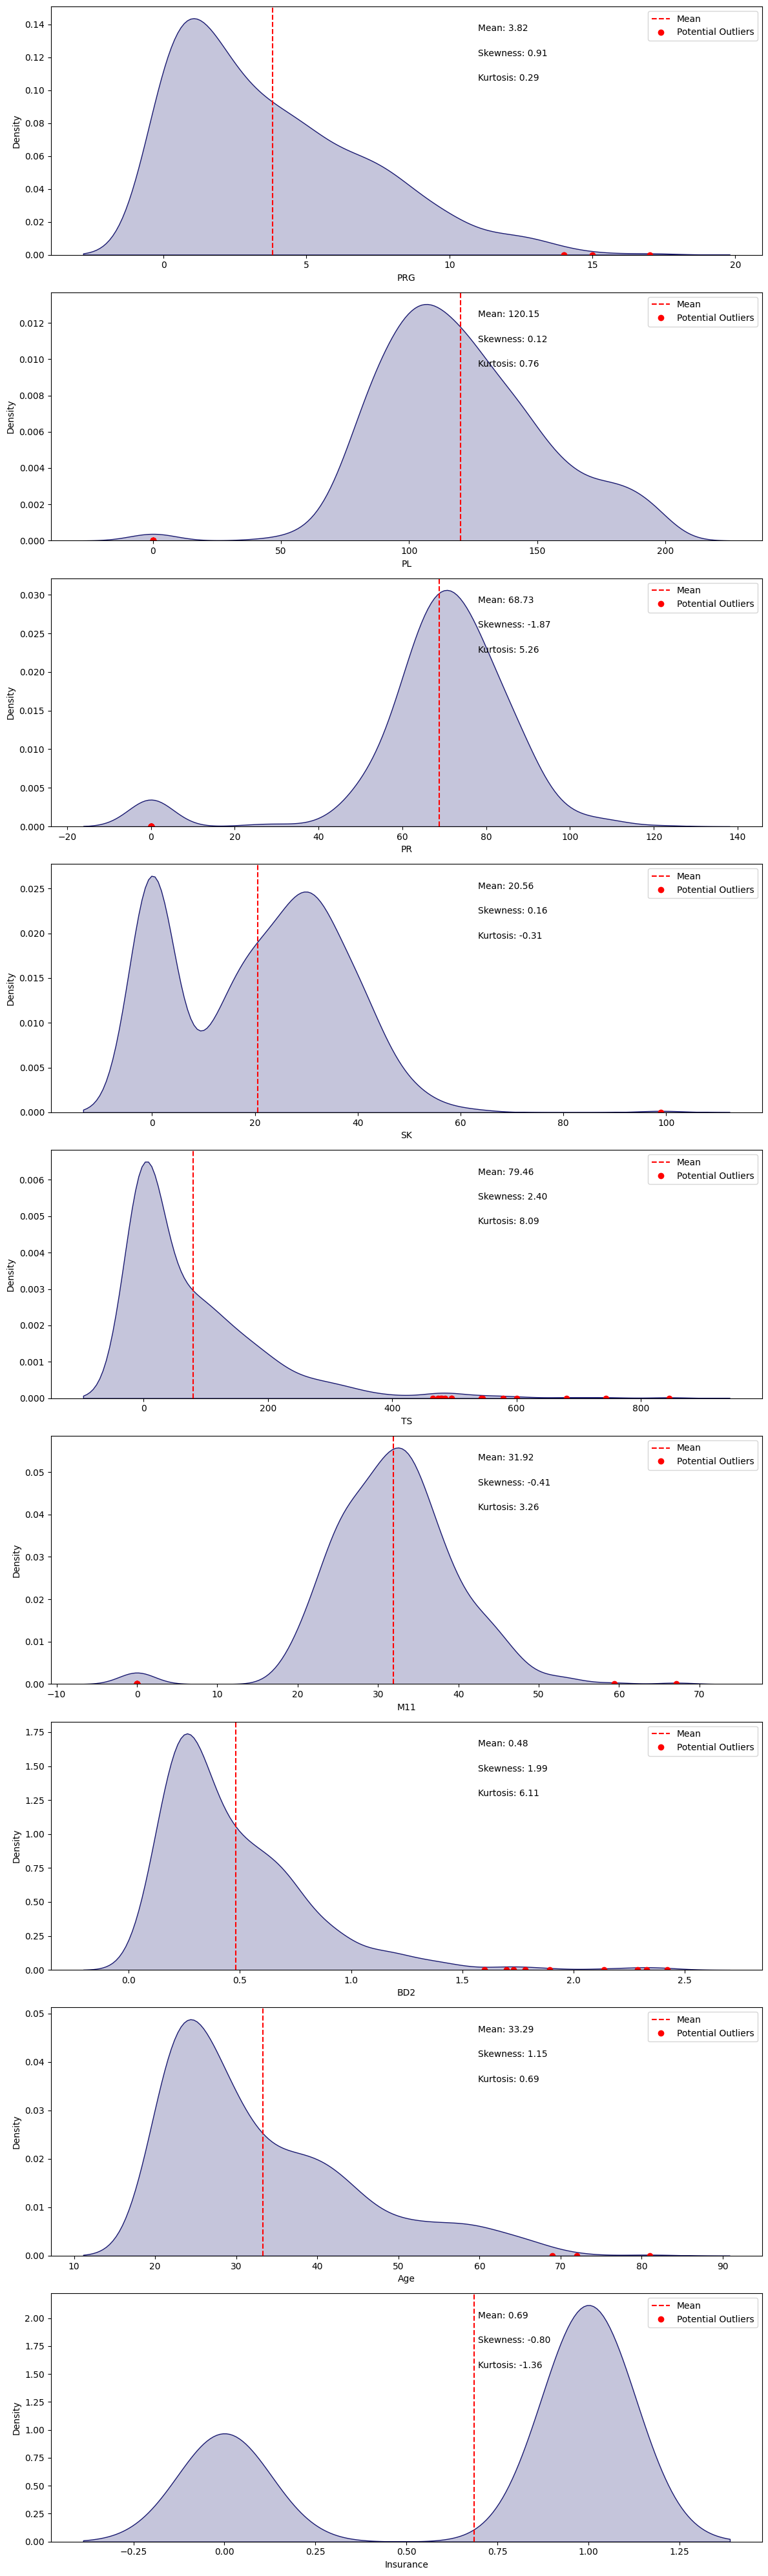

In [34]:
# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols), figsize=(12, 40))
for i, col in enumerate(cols):
    sns.kdeplot(data=df_Paitients_Files_Train, x=col, ax=axes[i], fill=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = df_Paitients_Files_Train[col].mean()
    skewness_val = df_Paitients_Files_Train[col].skew()
    kurtosis_val = df_Paitients_Files_Train[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
    # Add mean line
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    
    # Add red dots to indicate potential outliers
    outliers = df_Paitients_Files_Train[(df_Paitients_Files_Train[col] > mean_val + 3 * df_Paitients_Files_Train[col].std()) | (df_Paitients_Files_Train[col] < mean_val - 3 * df_Paitients_Files_Train[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')
    
    # Add legend
    axes[i].legend()
    
plt.tight_layout()
plt.show()


<b> Kurtosis measures the "tailedness" of a distribution, while skewness measures its asymmetry.

1. PRG (Plasma Glucose): The KDE plot reveals a distribution skewed towards higher values, indicating positive skewness. Moreover, it's platykurtic, displaying a flatter peak and lighter tails compared to a normal distribution.
2. PL (Blood Work Result-1): The KDE plot suggests a roughly symmetric distribution with an average value around 120.15. This distribution is mesokurtic, resembling a normal distribution in shape.
3. PR (Blood Pressure): The KDE plot indicates a negatively skewed distribution with a more peaked shape, potentially hinting at outliers.
4. SK (Blood Work Result-2): The KDE plot shows a slightly positively skewed distribution with a flatter shape, implying fewer outliers or extreme values.
5. TS (Blood Work Result-3): The KDE plot suggests a positively skewed distribution with a more peaked shape and heavier tails. This implies a higher frequency of lower values and the possibility of outliers.
6. M11 (Body Mass Index - BMI): The KDE plot indicates a slightly negatively skewed distribution with a more peaked shape and heavier tails. This suggests a higher frequency of higher BMI values and potential outliers.
7. BD2 (Blood Work Result-4): The KDE plot suggests a positively skewed distribution with a more peaked shape and heavier tails, indicating a higher frequency of extreme values or outliers.
8. Age: The KDE plot indicates a positively skewed distribution, with a concentration of younger individuals. This suggests a uniform spread of values without significant outliers, with a prevalence of younger ages compared to older ones.